In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [12]:
#importing Deep Learning libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop

In [13]:
pic_siz = 48
folder_path = 'data/'

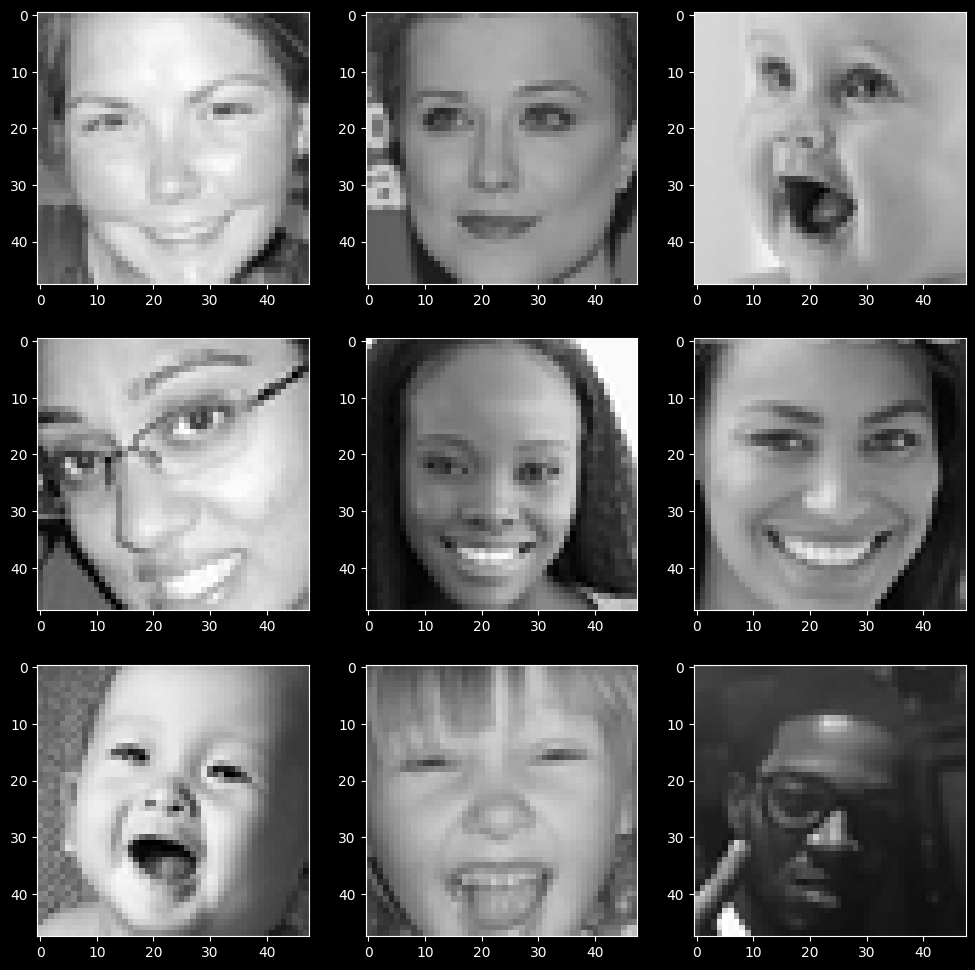

In [14]:
expression = 'happy'
plt.style.use("dark_background")
plt.figure(figsize=(12,12))
for i in range(1,10):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                   os.listdir(folder_path+"train/"+expression)[i], target_size = (pic_siz, pic_siz))
    plt.imshow(img)
plt.show()

In [15]:
batch_size = 128

data_train = ImageDataGenerator()
data_val = ImageDataGenerator()

train_set = data_train.flow_from_directory(folder_path+"train",
                                          target_size = (pic_siz,pic_siz),
                                          color_mode = 'grayscale',
                                          batch_size = batch_size,
                                          class_mode = "categorical",
                                          shuffle = True)
test_set = data_train.flow_from_directory(folder_path+"test",
                                          target_size = (pic_siz,pic_siz),
                                          color_mode = 'grayscale',
                                          batch_size = batch_size,
                                          class_mode = "categorical",
                                          shuffle = False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [16]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding='same',input_shape = (pic_siz, pic_siz, 1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully Connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

#Fully Connected 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation = 'softmax'))

opt = Adam(learning_rate=0.0001)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint('./model.h5', monitor = 'val_acc', verbose = 1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1,
                              restore_best_weights=True)
reduce_learning_rate = ReduceLROnPlateau(monitor='val_loss',
                                        factor=0.2,
                                        patience=3,
                                        verbose=1,
                                        min_delta=0.0001)
callbacks_list = [early_stopping,checkpoint,reduce_learning_rate]

epochs = 48

In [18]:
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n//test_set.batch_size,
                    callbacks=callbacks_list,
                    workers=2,
                    use_multiprocessing=False
                   )

Epoch 1/48
224/224 [==============================] - 21s 91ms/step - loss: 2.0434 - accuracy: 0.2295 - val_loss: 1.7579 - val_accuracy: 0.2877 - lr: 1.0000e-04
Epoch 2/48
224/224 [==============================] - 20s 91ms/step - loss: 1.8341 - accuracy: 0.2914 - val_loss: 1.7245 - val_accuracy: 0.3178 - lr: 1.0000e-04
Epoch 3/48
224/224 [==============================] - 20s 91ms/step - loss: 1.7276 - accuracy: 0.3376 - val_loss: 1.6771 - val_accuracy: 0.3534 - lr: 1.0000e-04
Epoch 4/48
224/224 [==============================] - 21s 93ms/step - loss: 1.6476 - accuracy: 0.3664 - val_loss: 1.6697 - val_accuracy: 0.3736 - lr: 1.0000e-04
Epoch 5/48
224/224 [==============================] - 21s 92ms/step - loss: 1.5908 - accuracy: 0.3909 - val_loss: 1.5316 - val_accuracy: 0.4102 - lr: 1.0000e-04
Epoch 6/48
224/224 [==============================] - 21s 92ms/step - loss: 1.5351 - accuracy: 0.4104 - val_loss: 1.4360 - val_accuracy: 0.4517 - lr: 1.0000e-04
Epoch 7/48
224/224 [==============

In [19]:
model.save("D:\ML\model1.h5")